In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
# Load from csv
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Display column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
# Check the shape (rows, columns)
df.shape

(1338, 7)

In [6]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Basic statistics for numeric columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Basic statiscal information of the categorical features 
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
# Check the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Check duplicated values
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
# Drop the duplicated rows
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
# Getting Numerical Columns
numerical_feature_columns = list(df._get_numeric_data().columns)
numerical_feature_columns

['age', 'bmi', 'children', 'charges']

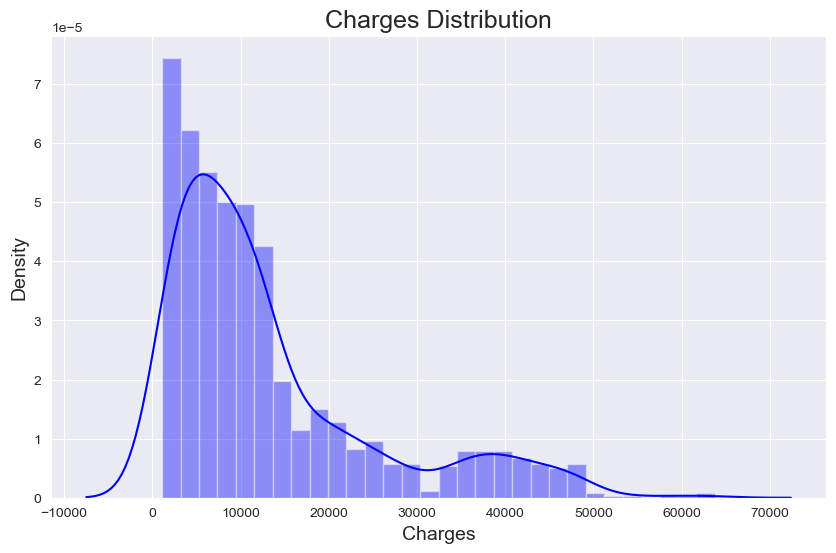

In [14]:
#Charges

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df.charges, color='b')
plt.title('Charges Distribution',size=18)
plt.xlabel('Charges',size=14)
plt.ylabel('Density',size=14)
plt.show()

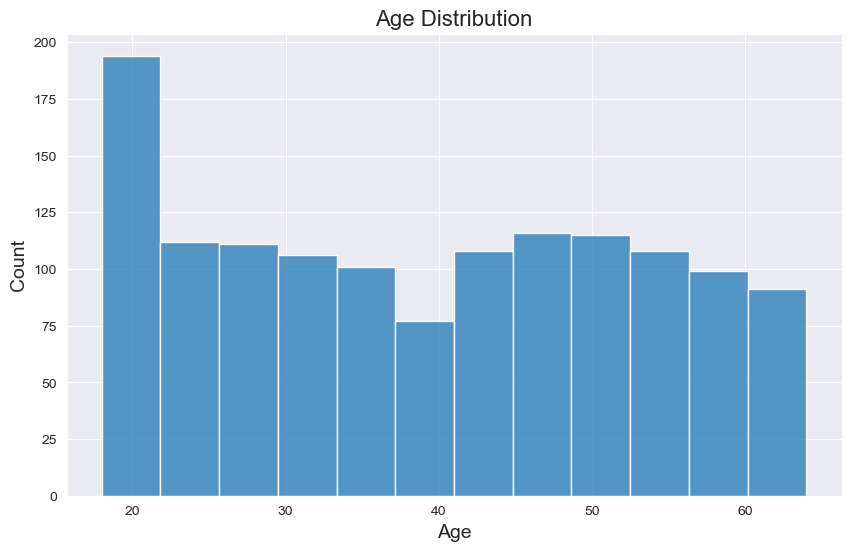

In [15]:
# Histogram plot for Age

plt.figure(figsize=(10,6))
sns.histplot(df.age)
plt.title('Age Distribution',size=16)
plt.xlabel('Age',size=14)
plt.ylabel('Count',size=14)
plt.show()

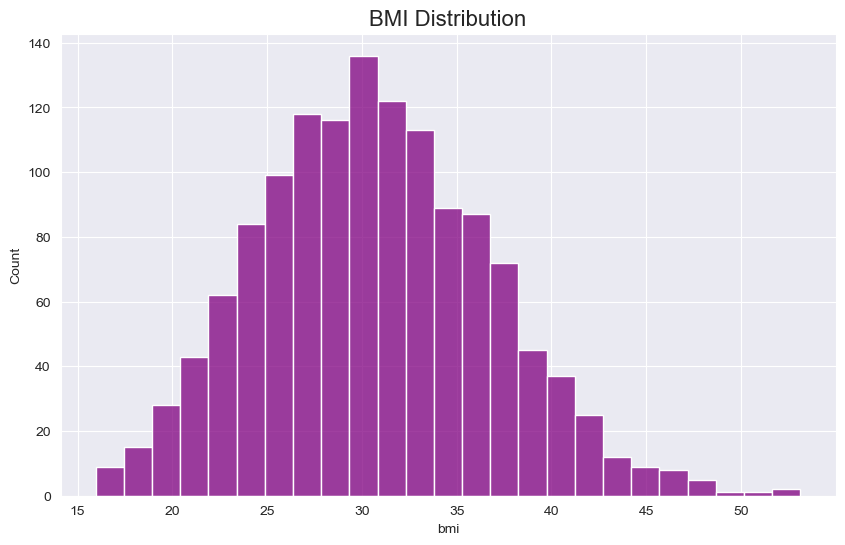

In [16]:
# Histogram plot for BMI

plt.figure(figsize = (10,6))
sns.histplot(df.bmi, color ='purple')
plt.title("BMI Distribution", size=16)
plt.show()

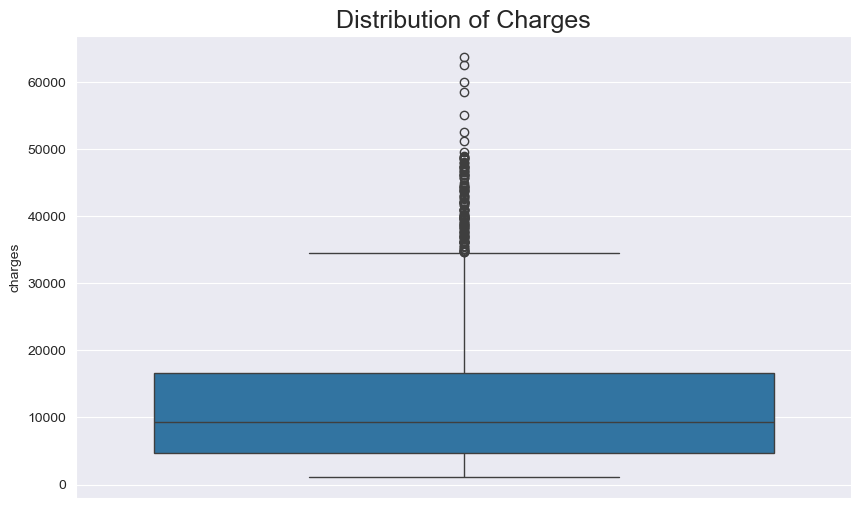

In [17]:
# Boxplot for charges

plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(df.charges)
plt.title('Distribution of Charges',size=18)
plt.show()

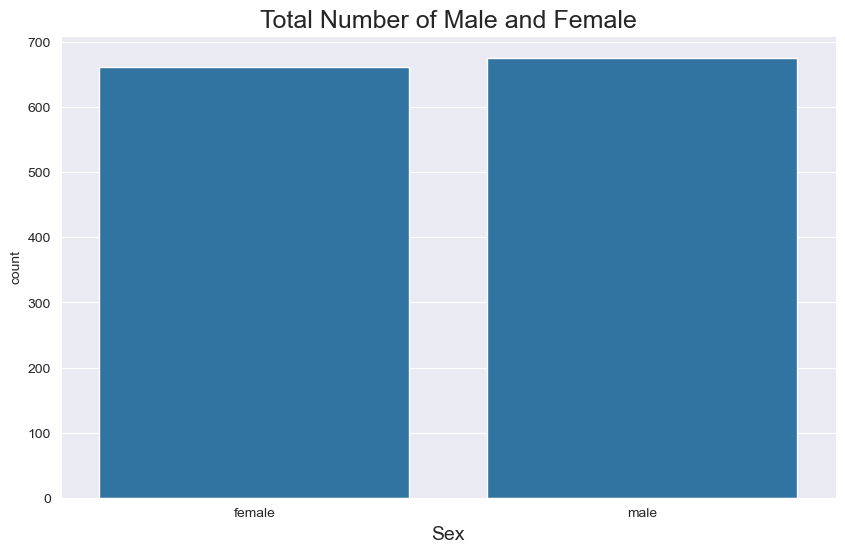

In [21]:
# Count plot for Gender

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.countplot(x = 'sex', data = df)
plt.title('Total Number of Male and Female',size=18)
plt.xlabel('Sex',size=14)
plt.show()

In [24]:
# Get the count of smoker column

smoker_count = df.smoker.value_counts()
smoker_count

smoker
no     1064
yes     274
Name: count, dtype: int64

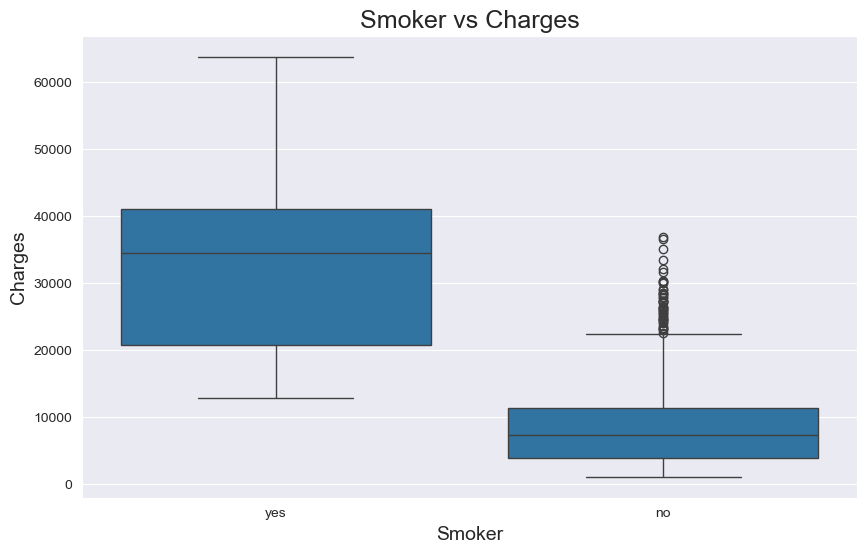

In [25]:
# Box-plot for Smoker vs Charges

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.boxplot(x = 'smoker', y = 'charges' , data = df)
plt.title('Smoker vs Charges',size=18)
plt.xlabel('Smoker', size=14)
plt.ylabel('Charges', size=14)
plt.show()

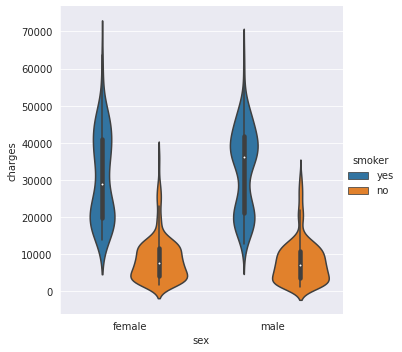

In [50]:
sns.catplot(x='sex', y='charges', hue='smoker', kind='violin', data=df)

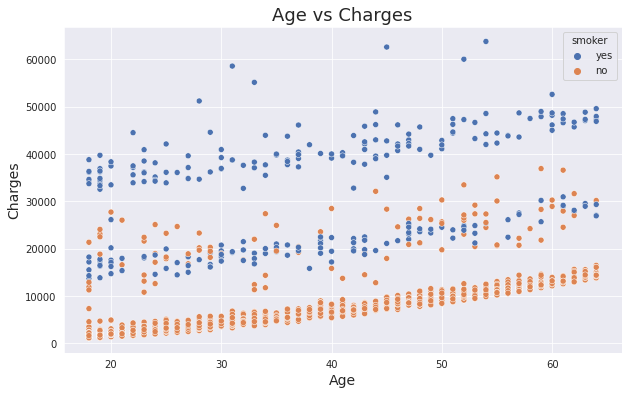

In [51]:
# Scatter Plot for Age vs Charges

plt.figure(figsize = (10,6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='deep')
plt.title('Age vs Charges', size=18)
plt.xlabel('Age', size=14)
plt.ylabel('Charges', size=14)
plt.show()

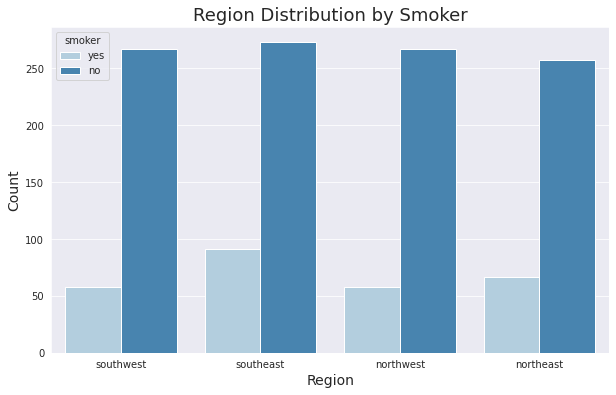

In [52]:
# Create a countplot of Region with a hue for Smoker

plt.figure(figsize=(10,6))
sns.countplot(x='region', data=df, hue='smoker', palette='Blues')
plt.title('Region Distribution by Smoker', size=18)
plt.xlabel('Region', size=14)
plt.ylabel('Count', size=14)
plt.show()

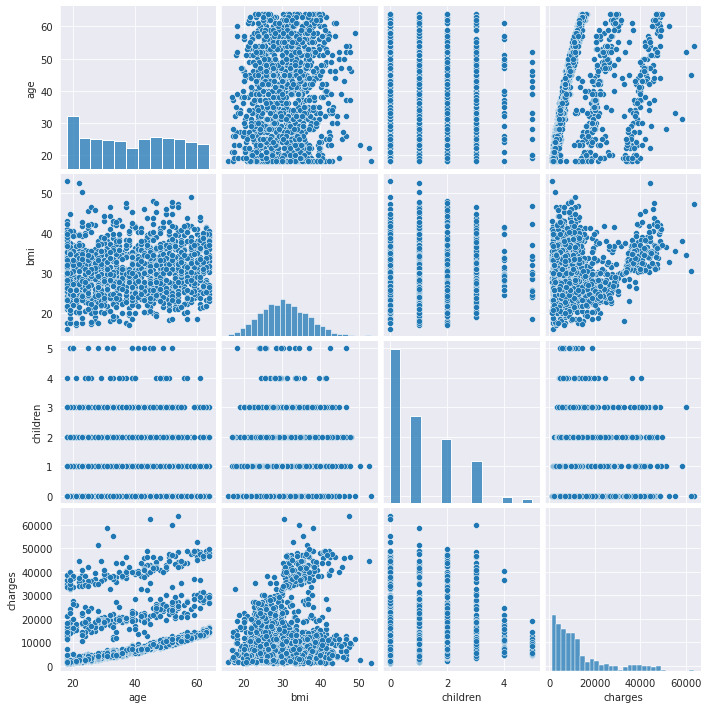

In [53]:
# Pair Plot

sns.pairplot(df)

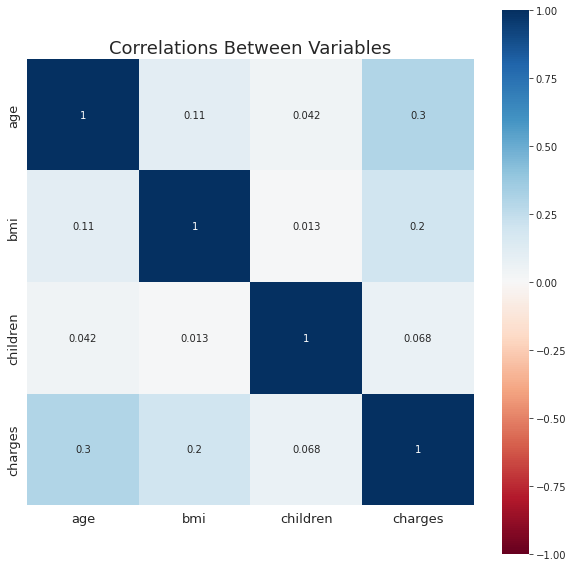

In [54]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True,square=True, cmap='RdBu', vmax=1, vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()